In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_log = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20Sales%20Log.csv")
accounts = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20Accounts.csv")

In [3]:
sales_log

,Event Name,Game Day,Game Day of Wk,Section,Row,Seat Qty,Acc #,Sale Date,Section Name,Promo Code,Comp,Current Block Price,Sale Day,Net Revenue,Unnamed: 14,Unnamed: 15
0,TML1028,2023-10-28,Sat,100,1,1,11992341,2023-10-14,Club Rinkside,NaN,N,78.25,Sat,74.52,NaN,NaN
1,TML1028,2023-10-28,Sat,100,1,1,13204621,2023-10-14,Club Rinkside,NaN,N,78.25,Sat,74.52,NaN,NaN
2,TML1028,2023-10-28,Sat,100,18,2,15827713,2023-10-28,Club Platinum,NaN,N,156.50,Sat,149.05,NaN,NaN
3,TML1028,2023-10-28,Sat,100,12,2,13425266,2023-10-28,Club Platinum,NaN,N,156.50,Sat,149.05,NaN,NaN
4,TML1028,2023-10-28,Sat,100,16,1,7834382,2023-10-25,Club Platinum,NaN,N,71.20,Wed,67.81,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25725,TML0505,2024-05-05,Sun,WC106,WC,2,17932830,2024-05-05,Defensive Corner - Upper,NaN,N,66.00,Sun,62.86,NaN,NaN
25726,TML0505,2024-05-05,Sun,WC115,WC,1,13212713,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN
25727,TML0505,2024-05-05,Sun,WC115,WC,1,16460088,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN
25728,TML0505,2024-05-05,Sun,WC115,WC,1,5412621,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN


In [4]:
accounts

,Acc #,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age
0,10921659.0,20.0,24.0,1597.86,Club Rinkside,East Toronto (Riverdale),M,27.0
1,2693583.0,18.0,59.0,1488.21,Family Zone,Etobicoke (Rexdale),M,41.0
2,13195933.0,18.0,42.0,2351.90,Blue Line,Etobicoke (Rexdale),M,37.0
3,11771829.0,17.0,18.0,407.38,Family Zone,Scarborough (STC),M,34.0
4,11895945.0,16.0,31.0,2495.24,Premium,West Toronto (High Park),M,19.0
...,...,...,...,...,...,...,...,...
12180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12185 entries, 0 to 12184
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Acc #                  12172 non-null  float64
 1   Games Attended         12172 non-null  float64
 2   Seat Qty               12172 non-null  float64
 3   Net Revenue            12172 non-null  float64
 4    Most Common Section   12172 non-null  object 
 5   Region                 12172 non-null  object 
 6   Gender                 12172 non-null  object 
 7   Age                    12172 non-null  float64
dtypes: float64(5), object(3)
memory usage: 761.7+ KB


In [6]:
print(accounts.columns)

Index(['Acc #', 'Games Attended', 'Seat Qty', 'Net Revenue',
       ' Most Common Section ', 'Region', 'Gender', 'Age'],
      dtype='object')


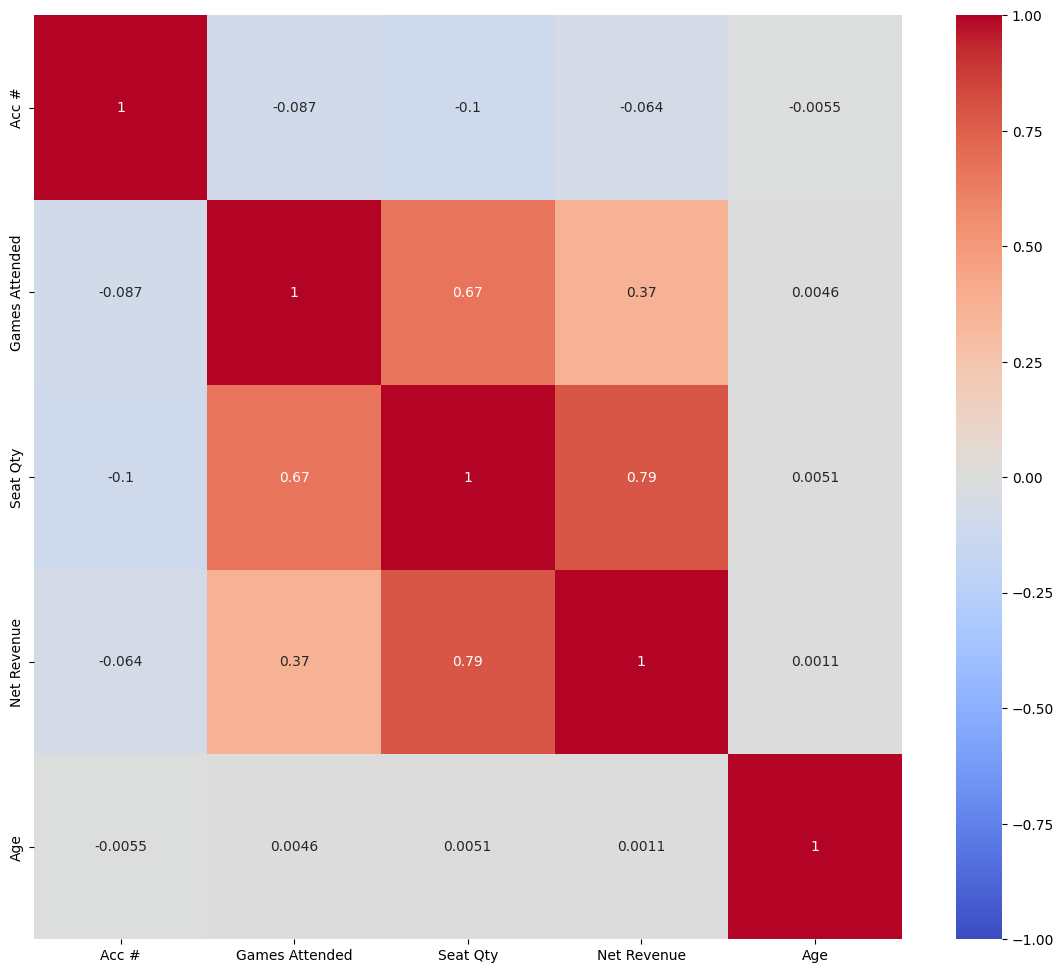

In [8]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [10]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(accounts)

ValueError: could not convert string to float: ' Club Rinkside '